In [5]:
#Predict delivery time using sorting time 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as smf

In [4]:
del_data=pd.read_csv("A:/Data Science/assignments/Linear Regression/delivery_time.csv")

In [5]:
del_data.shape


(21, 2)

In [6]:
del_data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
del_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


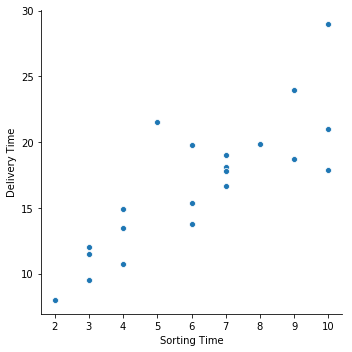

In [8]:
sns.relplot(x="Sorting Time",y="Delivery Time",data=del_data,kind="scatter")

In [9]:
del_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
del_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [16]:
del_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [15]:
del_data=del_data.rename(columns={'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'})

In [16]:
del_data.columns

Index(['Delivery_time', 'Sorting_time'], dtype='object')

In [17]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery_time    21 non-null float64
Sorting_time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [ ]:
#Findings
#12 rows and 2 coloumns
#No missing values
#Sorting time is 82% correlated to delivery time

In [ ]:
#Linear Regression

In [20]:
x=del_data['Sorting_time']
y=del_data['Delivery_time']

In [28]:
reg=smf.OLS(del_data['Delivery_time'],del_data['Sorting_time']).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Mon, 25 May 2020   Prob (F-statistic):                    6.12e-15
Time:                        12:38:01   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg.params

Sorting Time    2.565246
dtype: float64

In [59]:
reg.rsquared

0.955005401256664

In [28]:
predict_del=reg.predict(x)

Text(0,0.5,'Delivery time')

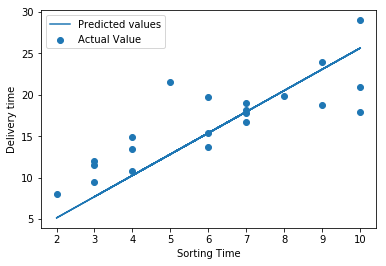

In [63]:
plt.scatter(del_data.Sorting_time,del_data.Delivery_time,label="Actual Value")
plt.plot(del_data.Sorting_time,predict_del,label="Predicted values")
plt.legend()
plt.xlabel('Sorting Time')
plt.ylabel('Delivery time')

In [48]:
predict_del.head().round()

0    26.0
1    10.0
2    15.0
3    23.0
4    26.0
dtype: float64

In [47]:
del_data.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
#Report
#R2 value is 95%
